# WiDS Datathon 2026 Notebook
This is where your analysis begins. Use this notebook for EDA, modeling, and explanations.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import pandas as pd
df = pd.read_csv("/content/watchduty.csv")

#1. Problem Statement & Track Choice
We are participating in Track 1: Accelerating Equitable Evacuations.

Goal: Reduce evacuation alert delays and improve response times for vulnerable communities using WatchDuty wildfire data.

# 2. Data Sources

This project uses WatchDuty wildfire incident data and evacuation updates, combined with public demographic and geographic datasets.


# 3. Data Loading


In [4]:
# Basic setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

# Show versions for reproducibility
import sys
print("Python:", sys.version)
print("Pandas:", pd.__version__)
print("NumPy:", np.__version__)

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Pandas: 2.2.2
NumPy: 2.0.2


In [5]:
!unzip wids-university-datathon-2025.zip

Archive:  wids-university-datathon-2025.zip
  inflating: WiDS _-_ Watch Duty_ Data Dictionary.docx  
  inflating: evac_zone_status_geo_event_map.csv  
  inflating: evac_zones_gis_evaczone.csv  
  inflating: evac_zones_gis_evaczonechangelog.csv  
  inflating: fire_perimeters_gis_fireperimeter.csv  
  inflating: fire_perimeters_gis_fireperimeterchangelog.csv  
  inflating: geo_events_externalgeoevent.csv  
  inflating: geo_events_externalgeoeventchangelog.csv  
  inflating: geo_events_geoevent.csv  
  inflating: geo_events_geoeventchangelog.csv  


In [6]:
import os

os.listdir("/content")

['.config',
 'evac_zones_gis_evaczonechangelog.csv',
 'fire_perimeters_gis_fireperimeter.csv',
 'geo_events_externalgeoevent.csv',
 'wids-university-datathon-2025.zip',
 'geo_events_geoeventchangelog.csv',
 'evac_zone_status_geo_event_map.csv',
 'geo_events_geoevent.csv',
 '.ipynb_checkpoints',
 'WiDS _-_ Watch Duty_ Data Dictionary.docx',
 'evac_zones_gis_evaczone.csv',
 'geo_events_externalgeoeventchangelog.csv',
 'fire_perimeters_gis_fireperimeterchangelog.csv',
 'sample_data']

In [7]:
evac_map = pd.read_csv("/content/evac_zone_status_geo_event_map.csv")
evac_zones = pd.read_csv("/content/evac_zones_gis_evaczone.csv")
fires = pd.read_csv("/content/fire_perimeters_gis_fireperimeter.csv")
geo_events = pd.read_csv("/content/geo_events_geoevent.csv")

print(evac_map.shape)
print(evac_zones.shape)
print(fires.shape)
print(geo_events.shape)

(4429, 3)
(37458, 16)
(6207, 14)
(62696, 17)


In [8]:
evac_map.head()

,date_created,uid_v2,geo_event_id
0,2023-10-25 11:28:15.254517,sierra-CA_US-SIE-E062-778dddb3cad71e9f,14107
1,2023-10-25 11:28:15.254550,sierra-CA_US-SIE-E063-f59f54f1edf93b15,14107
2,2023-10-25 11:28:15.254565,sierra-CA_US-SIE-E060-64dbd0e15d47d9bb,14107
3,2023-11-02 21:52:49.867450,butte-CA_US-BUT-CNE-311-474a247dbeb74ebf,14505
4,2024-05-02 20:53:00.964490,kern-CA_US-KRN-289-7cd3f4bbc76a4b2d,18785


# 4. Exploratory Data Analysis (EDA)

We explore wildfire incidents, evacuation timelines, and geographic patterns to understand where alert delays may occur and which communities may be at higher risk.

In [9]:
datasets = {
    "evac_map": evac_map,
    "evac_zones": evac_zones,
    "fires": fires,
    "geo_events": geo_events
}

for name, df in datasets.items():
    print("\n====", name, "====")
    print(df.shape)
    display(df.head(3))


==== evac_map ====
(4429, 3)


,date_created,uid_v2,geo_event_id
0,2023-10-25 11:28:15.254517,sierra-CA_US-SIE-E062-778dddb3cad71e9f,14107
1,2023-10-25 11:28:15.254550,sierra-CA_US-SIE-E063-f59f54f1edf93b15,14107
2,2023-10-25 11:28:15.254565,sierra-CA_US-SIE-E060-64dbd0e15d47d9bb,14107



==== evac_zones ====
(37458, 16)


,id,date_created,date_modified,uid_v2,is_active,display_name,region_id,source_attribution,dataset_name,source_extra_data,geom,status,geom_label,is_pending_review,pending_updates,external_status
0,1,2025-04-10 13:22:22.896704+00,2025-08-19 01:58:01.009206+00,boulder-CO_US-BO-030-cc87104888faec63,True,BO-030,664,Genasys Protect,boulder-CO_US,{},SRID=4326;POLYGON((-105.281982421875 40.000070...,NaN,SRID=4326;POINT(-105.2735804268792 40.00182377...,False,NaN,Normal
1,2,2025-04-10 13:22:22.896921+00,2025-08-19 01:58:01.00957+00,boulder-CO_US-BO-023-bf0c7318a31e33c2,True,BO-023,664,Genasys Protect,boulder-CO_US,{},SRID=4326;POLYGON((-105.2254199981689 40.01466...,NaN,SRID=4326;POINT(-105.2345969160621 40.02228713...,False,NaN,Normal
2,3,2025-04-10 13:22:22.897002+00,2025-08-19 01:58:01.009741+00,boulder-CO_US-BO-031-d365d7b1d6a30d16,True,BO-031,664,Genasys Protect,boulder-CO_US,{},SRID=4326;POLYGON((-105.2583789825439 40.01459...,NaN,SRID=4326;POINT(-105.2665242186653 40.00886663...,False,NaN,Normal



==== fires ====
(6207, 14)


,id,date_created,date_modified,geo_event_id,approval_status,source,source_unique_id,source_date_current,source_incident_name,source_acres,geom,is_visible,is_historical,source_extra_data
0,1,2025-01-21 01:23:38.648183+00,2025-01-21 01:23:38.648194+00,40388.0,pending,nifc,2a0b8caf-d5bb-48e1-94d7-2590f66b0355,2025-01-18 23:33:05+00,Eaton,14021.108712,SRID=4326;MULTIPOLYGON(((-118.083071 34.237698...,False,False,NaN
1,2,2025-01-21 11:26:32.839327+00,2025-02-07 19:20:06.614662+00,40930.0,approved,firis,53bb0a67-7739-4be6-af9f-d63bc9c82b9d,2025-01-21 11:20:26.694+00,CA-SDU-PALA-N40Y,16.842322,SRID=4326;POLYGON((-117.1615690000001 33.36066...,True,True,NaN
2,3,2025-01-21 13:56:01.312899+00,2025-01-21 17:29:49.778747+00,40932.0,approved,firis,4f4e79d2-f6d0-4bf7-a945-ea3aacb99dc6,2025-01-21 11:49:47.798+00,CA-SDU-LILAC-N40Y,80.054733,SRID=4326;MULTIPOLYGON(((-117.157505 33.307591...,False,False,NaN



==== geo_events ====
(62696, 17)


,id,date_created,date_modified,geo_event_type,name,is_active,description,address,lat,lng,data,notification_type,external_id,external_source,incident_id,reporter_managed,is_visible
0,76,2021-08-11 00:09:56.481066,2023-02-09 20:34:24.180117,wildfire,Todd Fire,0,NaN,"Llano Rd & Todd Rd, Santa Rosa, California 95...",38.386100,-122.769299,"{""is_fps"": false, ""acreage"": 50, ""containment""...",normal,1008375748,pulsepoint,76.0,1,0
1,77,2021-08-11 07:21:46.054995,2023-02-09 20:34:24.225186,wildfire,Vegetation Fire,0,NaN,"Guerneville Rd & W Steele Ln, Santa Rosa, CA 9...",38.459967,-122.728927,"{""is_fps"": false, ""acreage"": 0, ""containment"":...",normal,1008583077,pulsepoint,77.0,1,0
2,78,2021-08-11 21:02:16.301416,2023-02-09 20:34:24.266124,wildfire,Ford Fire,0,NaN,"CA-1 & Valley Ford Estero Rd, Valley Ford, CA ...",38.318328,-122.925698,"{""is_fps"": false, ""acreage"": 0, ""containment"":...",normal,1008957703,pulsepoint,78.0,1,0


In [10]:
for name, df in datasets.items():
    print("\n", name)
    for col in df.columns:
        if "time" in col.lower() or "date" in col.lower():
            print("  ", col)


 evac_map
   date_created

 evac_zones
   date_created
   date_modified
   pending_updates

 fires
   date_created
   date_modified
   source_date_current

 geo_events
   date_created
   date_modified


In [11]:
for name, df in datasets.items():
    print("\n====", name, "====")
    for col in df.columns:
        if "date" in col.lower() or "time" in col.lower():
            print(col)


==== evac_map ====
date_created

==== evac_zones ====
date_created
date_modified
pending_updates

==== fires ====
date_created
date_modified
source_date_current

==== geo_events ====
date_created
date_modified


In [12]:
# Convert timestamp columns to datetime

evac_map["date_created"] = pd.to_datetime(evac_map["date_created"], errors="coerce")

evac_zones["date_created"] = pd.to_datetime(evac_zones["date_created"], errors="coerce")
evac_zones["date_modified"] = pd.to_datetime(evac_zones["date_modified"], errors="coerce")

fires["date_created"] = pd.to_datetime(fires["date_created"], errors="coerce")
fires["date_modified"] = pd.to_datetime(fires["date_modified"], errors="coerce")
fires["source_date_current"] = pd.to_datetime(fires["source_date_current"], errors="coerce")

geo_events["date_created"] = pd.to_datetime(geo_events["date_created"], errors="coerce")
geo_events["date_modified"] = pd.to_datetime(geo_events["date_modified"], errors="coerce")

In [13]:
fires_start = geo_events[
    geo_events["geo_event_type"] == "wildfire"
][["id", "date_created"]].rename(
    columns={"id": "geo_event_id", "date_created": "fire_start_time"}
)

fires_start.head()

,geo_event_id,fire_start_time
0,76,2021-08-11 00:09:56.481066
1,77,2021-08-11 07:21:46.054995
2,78,2021-08-11 21:02:16.301416
3,79,2021-08-12 01:46:31.043052
4,80,2021-08-12 02:40:30.939331


In [14]:
evac_events = evac_map.merge(
    fires_start,
    on="geo_event_id",
    how="left"
)

evac_events.head()

,date_created,uid_v2,geo_event_id,fire_start_time
0,2023-10-25 11:28:15.254517,sierra-CA_US-SIE-E062-778dddb3cad71e9f,14107,2023-10-25 09:09:37.315114
1,2023-10-25 11:28:15.254550,sierra-CA_US-SIE-E063-f59f54f1edf93b15,14107,2023-10-25 09:09:37.315114
2,2023-10-25 11:28:15.254565,sierra-CA_US-SIE-E060-64dbd0e15d47d9bb,14107,2023-10-25 09:09:37.315114
3,2023-11-02 21:52:49.867450,butte-CA_US-BUT-CNE-311-474a247dbeb74ebf,14505,2023-11-02 21:48:54.382851
4,2024-05-02 20:53:00.964490,kern-CA_US-KRN-289-7cd3f4bbc76a4b2d,18785,2024-05-02 20:22:15.121138


In [15]:
evac_events["delay_hours"] = (
    evac_events["date_created"] - evac_events["fire_start_time"]
).dt.total_seconds() / 3600

evac_events[["geo_event_id", "delay_hours"]].describe()

,geo_event_id,delay_hours
count,4429.000000,4383.000000
mean,40887.053059,67.292049
std,12917.940143,141.533917
min,14107.000000,0.003858
25%,27638.000000,1.504027
50%,40335.000000,11.456208
75%,53015.000000,70.064476
max,64346.000000,1709.782480


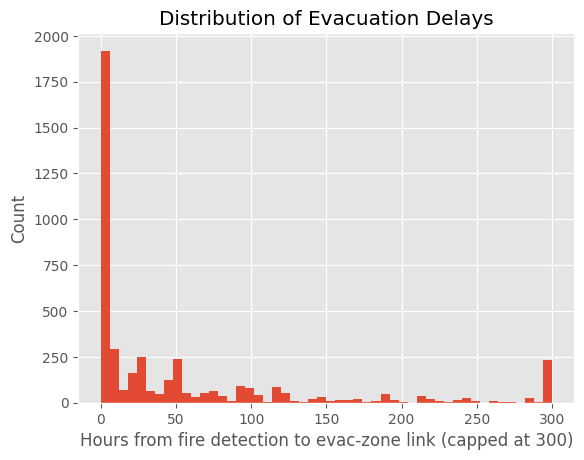

In [16]:
plt.figure()
evac_events["delay_hours"].dropna().clip(upper=300).hist(bins=50)
plt.xlabel("Hours from fire detection to evac-zone link (capped at 300)")
plt.ylabel("Count")
plt.title("Distribution of Evacuation Delays")
plt.show()

The distribution shows heavy skew. While many evacuation zones are linked within a few hours, a long tail of cases exceed multiple days, motivating earlier-warning heuristics and equity-focused prioritization.


In [17]:
evac_events.merge(
    geo_events[["id", "lat", "lng"]],
    left_on="geo_event_id",
    right_on="id",
    how="left"
)[["delay_hours", "lat", "lng"]].describe()

,delay_hours,lat,lng
count,4383.000000,4383.000000,4383.000000
mean,67.292049,38.575379,-117.593997
std,141.533917,4.498773,7.546043
min,0.003858,20.628580,-157.072933
25%,1.504027,34.189299,-121.546897
50%,11.456208,38.909485,-119.160375
75%,70.064476,41.915140,-117.440592
max,1709.782480,47.372305,-91.839250


## Initial Findings: Evacuation Timing

We observe a highly skewed distribution in the delay between wildfire detection and evacuation-zone linkage. While many incidents show rapid action, a substantial tail extends to multiple days.

This suggests that a subset of fires may benefit from earlier automated triggers, especially in regions or conditions associated with slower response.

In [18]:
# Label slow vs fast responses using median split
median_delay = evac_events["delay_hours"].median()

evac_events["slow_response"] = evac_events["delay_hours"] > median_delay

evac_events["slow_response"].value_counts()

,count
slow_response,
False,2238
True,2191


In [19]:
evac_with_fires = evac_events.merge(
    fires[["geo_event_id", "source_acres"]],
    on="geo_event_id",
    how="left"
)

evac_with_fires.groupby("slow_response")["source_acres"].describe()

,count,mean,std,min,25%,50%,75%,max
slow_response,,,,,,,,
False,7582.0,15254.502355,30567.309908,0.100000,669.173148,2134.019535,15570.686185,132761.638485
True,27916.0,50282.986964,50112.220305,0.152734,10712.000000,21702.613876,99135.485255,452828.786383


## Relationship Between Fire Size and Evacuation Timing

Splitting incidents into fast and slow evacuation-response groups reveals a large difference in fire size.

Slow-response fires have a median burned area of ~21,700 acres, compared to ~2,100 acres for faster-response incidents. Mean acreage is also substantially higher for slow-response fires.

This suggests that large, complex fires may take longer to trigger evacuation-zone actions, potentially because of uncertainty during early growth phases or geographic scale. These patterns motivate a predictive model that flags high-risk fires early to accelerate evacuation messaging.

#5 Feature Engineering
We construct a modeling dataset by combining evacuation-delay labels with early-available fire characteristics such as initial acreage and location. Rows with missing values are removed to ensure reproducibility.

In [20]:
# Combine geo location + fire size + timestamps

model_df = evac_with_fires.merge(
    geo_events[["id", "lat", "lng"]],
    left_on="geo_event_id",
    right_on="id",
    how="left"
)

model_df = model_df[[
    "delay_hours",
    "slow_response",
    "source_acres",
    "lat",
    "lng"
]].dropna()

model_df.describe()

,delay_hours,source_acres,lat,lng
count,35498.000000,35498.000000,35498.000000,35498.000000
mean,103.010904,42801.270520,38.658471,-114.309204
std,122.274779,48790.347010,4.780898,10.201697
min,0.006114,0.100000,32.585500,-123.611204
25%,21.444312,3992.600000,35.102000,-120.110019
50%,48.110625,16332.462337,36.795371,-120.110019
75%,143.491072,83959.111156,41.786085,-108.234010
max,624.668730,452828.786383,47.372305,-91.839250


#6 Modeling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier

X = model_df[["source_acres", "lat", "lng"]]
y = model_df["slow_response"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

       False       0.65      0.90      0.76      1896
        True       0.97      0.87      0.92      6979

    accuracy                           0.88      8875
   macro avg       0.81      0.88      0.84      8875
weighted avg       0.90      0.88      0.88      8875

ROC AUC: 0.9439573618383783


In [22]:
import pandas as pd

fi = pd.Series(rf.feature_importances_, index=X.columns)\
        .sort_values(ascending=False)

fi

,0
lat,0.382326
source_acres,0.353561
lng,0.264113


## Baseline Model Performance

A Random Forest classifier trained on early-available features (initial reported acreage and location) achieves:

- ROC AUC: 0.94
- Overall accuracy: 88%

The model shows high recall (0.87) for slow-response incidents, meaning it successfully flags most fires that later experience delayed evacuation actions. This supports use as an early-warning prioritization tool for agencies to trigger faster outreach and evacuation planning.

## Feature Importance

Latitude and longitude are the strongest predictors, suggesting regional variation in evacuation response patterns. Fire size is also highly influential, indicating that early acreage estimates may provide useful signals for escalation.


In [24]:
# Focus on test-set fires predicted as slow
test_idx = X_test.index

results = model_df.loc[test_idx].copy()
results["pred_slow"] = y_pred

flagged = results[results["pred_slow"] == True]

flagged["delay_hours"].describe()

,delay_hours
count,6258.000000
mean,136.226351
std,125.870074
min,1.000314
25%,46.208640
50%,104.184227
75%,160.893625
max,624.668730


## Potential Operational Impact

Among fires flagged by the model as likely to experience delayed evacuation responses, the median historical delay is ~104 hours.

If responders used this model to trigger earlier outreach, multilingual alerts, or evacuation readiness protocols even 12–24 hours sooner, the benefit would be substantial for high-risk communities. This provides a concrete, measurable impact aligned with Track 1’s goal of accelerating equitable evacuations.


In [25]:
(results["pred_slow"] == True).mean(), (flagged["delay_hours"] > 24).mean()

(np.float64(0.7051267605633803), np.float64(0.8582614253755193))

## 24-Hour Early-Action Scenario

In a simulated deployment on held-out test data, the model flags approximately 70% of incidents as likely slow-response.

Among those flagged, 86% historically experienced evacuation delays greater than 24 hours. This suggests that an automated early-trigger system could prioritize resources toward cases where meaningful lead time is available to improve warning dissemination and evacuation readiness.


In [26]:
# Regional aggregation by rounding coordinates
model_df["lat_bin"] = model_df["lat"].round(1)
model_df["lng_bin"] = model_df["lng"].round(1)

model_df.groupby(["lat_bin", "lng_bin"])["delay_hours"].median()\
        .sort_values(ascending=False)\
        .head(10)

,,delay_hours
lat_bin,lng_bin,
37.7,-108.2,574.139864
46.8,-121.4,382.575198
41.3,-123.4,284.155702
36.9,-119.0,241.980604
40.8,-122.1,225.612646
38.8,-108.9,171.885580
34.0,-109.5,146.889324
35.1,-120.1,123.096164
39.9,-108.2,122.564020


## Geographic Patterns in Evacuation Delays

Spatial aggregation reveals clusters of consistently high evacuation delays. Several latitude–longitude bins show median delays exceeding 200–500 hours, indicating regional disparities in response timing.

These hotspots represent priority areas where predictive early triggers and targeted outreach could yield disproportionate safety benefits.

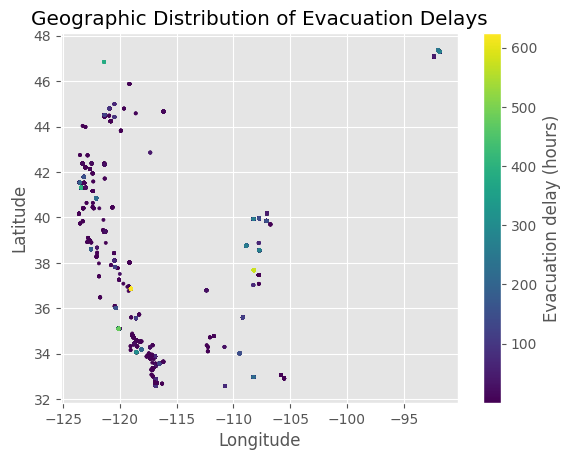

In [27]:
plt.figure()
plt.scatter(
    model_df["lng"],
    model_df["lat"],
    c=model_df["delay_hours"],
    s=5,
)
plt.colorbar(label="Evacuation delay (hours)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Geographic Distribution of Evacuation Delays")
plt.show()

Points colored by evacuation delay show spatial clustering, motivating region-specific evacuation playbooks and trigger thresholds.